# Part 3: Statistical Models and Methods. 

# ch 13 Linear and Logistic Regression 

**Definition:** A <u>regression function</u> for a response random variable $Y$ and predictor random variable $X$ is the function $r$ dermined by their joint distribution $f_{X,Y}$ by 
$$
r(x) = \mathbb{E}_{Y|X}(Y|X=x) = \int y f_{Y|X}(y|x)dy \,.
$$

**Definition:** In <u>regression analysis</u> we use a random sample $(X_1,Y_1),...,(X_n,Y_n)$ of the random vector $(X,Y)$ to create an estimator $\hat{r}$ of the regression function $r$ of $(X,Y)$.

There are two ways to form these estimators;
1. parameteric estimation
    - create a estimator of the regression function that is an element of a parameterized model $\{r_\theta | \theta \in \Theta\}$.
2. Nonparametric estimation, ch20 and 21

**Definition:** In a <u>simple linear regression model</u> one looks for a regression function in the parameterized model $\{\beta_1x+\beta_0|\beta_1,\beta_0 \in \mathbb{R}\}$. 


Wasserman adds $\mathbb{E}(\epsilon_i|X_i) = 0,~\mathbb{V}(\epsilon_i|X_i)=\sigma^2$ here, but I am unclear if these conditions are trully needed for a simple linear regression model with minimum assumptions. I try to proceed without it... and seem to succeed. 

**Definition:** The <u>predictor</u> using the estimator $\hat{\theta}$ from the regression model $\{r_\theta | \theta\in \Theta\}$ is $r_{\hat{\theta}}$. 

Let $\hat{\beta}_i$ be estimators of $\beta_i$ in a simple linear regression model. The predictor using these estimators is the affine function $r_{\hat{\beta_i}}$ such that $r_{\hat{\beta_i}}(x)=\hat{\beta_1}x + \hat{\beta}_0$. 

Terminology: The predictor is also called the <u>fitted model</u>, or in the simple linear case the <u>fitted line</u>.

**Definition:** The <u>predicted values</u> from the predictor $r_{\hat{\beta_i}}$ for the random sample $(X_1,Y_1),...,(X_n,Y_n)$ are the random variables $\left\{r_{\hat{\beta_i}}(X_i)|i=1,...,n\right\}$.

Ambiguity: I think the first option, but I can't tell. 
- Is $X_2$ used simultaneously in $\beta_1$ and in the argument of $r_{\hat{\beta_i}}(X_2)$ so that if I'm calculating $\mathbb{E}_{X_2}r_{\hat{\beta_i}}(X_2)$ I need to take into account both places that $X_2$ occurs? 
- Or am I meant to think of a observatino for the random sample and then put a random variable in ?

**Notation:** The predicted values for the random sample $\{(X_1,Y_1)|i=1,...,n\}$ are denoted $\hat{Y}_i:=r_{\hat{\beta_i}}(X_i)$.

**Definition** The <u>residuals</u>  are $\left\{ \hat{\epsilon_i} = Y_i - \hat{Y}_i|i=1,...,n\right\}$. 

While we are not going to look for the distribution $f_{X,Y}$, we are going to examine the residuals as a way to estimate the quantities
$$
\epsilon _i = Y_i - (\beta_1 X_i +\beta_0) \, . 
$$
I think, in particular, that we will make assumptions about the $\epsilon_i$ and then see if the observation for the random sample is of low proability under that assumption. 

<details>
    <summary>I do not know how to reconcile this with $Y=r(x)+\epsilon$.</summary>
Attempting to reconcile... 
    
When taking an observation $y$ of $Y$ there will be error $e$ in $r(x)$ so that 
$$
y = r(x) + \epsilon
$$
Promoting $y$ and $e$ to random variables $Y$ and $\epsilon$, 
$$
Y= r(x) +\epsilon \\ 
Y = \mathbb{E}_{Y|X=x}(Y) + \epsilon \\
\,.
$$
Thus, our assumption amounts to the assumption that there is a random variable $\epsilon$ that.... No, **the equation above feels like we define $\epsilon$ in terms of $f_{X,Y}$** since that determines $r(x)$ and $Y$. 

I think this serves as a definition of $\epsilon$. But I think we should be introducing a new random variable so that there is a new joint distribution $f(x,y,e)$ and I think that we will use that 3 variable distribution to characterize the probability that data came from a linear relationship. 

Since $x$ is just an observation of $X$, and since the relationship holds for all values of $x$, we can generalize to the random variable $X$.  
$$
Y=\beta_1X + \beta_0 +\epsilon
$$
Each random variable from a random sample will potentially have a different error term $\epsilon_i$ so that 
$$
Y_i= \beta_1 X_i +\beta_0 +\epsilon_i \, . 
$$

</details>

The most common hypothesis about the $\epsilon_i$ is that $\mathbb{E}(\epsilon_i) = 0 $ and $\mathbb{V}(\epsilon_i) = \sigma^2$, and these quantities are constant with respect to $i$. Before proceeding, we need estimators of $\beta$.


## 13.2 Least squares estimator and MLE

### Least Squares Estimator

**Definition:** The <u>least squares estimator</u> of $\beta$ is the minimizer of the sum of squares of residuals $\sum_i\hat{\epsilon_i}$.

That last quantity is called the residual sum of squares, RSS. 

**Theorem:** The least squares estimator $\hat{\beta}$ of $\beta$ under the sample $(X,Y)^n$ is 
$$
\hat{\beta}
=\left(\begin{array}{c}\hat{\beta}_1 \\ \hat{\beta}_0 \end{array}\right)  
=\left( \begin{array}{c}  
\frac{\sum_{i=1}^n (X_i - \bar{X}_n)(Y_i - \bar{Y}_n)}{\sum_{j=1}^n (X_j - \bar{X}_n)^2}
\\
\bar{Y}_n - \beta_1 \bar{X}_n
\end{array}\right)
$$

**Proof:** Let $X^n = (X_1,...,X_n)$, $Y^n=(Y_1,...,Y_n)$. Let $1 = (1,...,1)$ so that we can define the averages $\bar{X}_n = \frac{X^n 1^T}{n}$, $\bar{Y}_n =\frac{ Y 1^T}{n}$. Using them, we defined the centered random sample $\check{X} = X^n - \bar{X}_n 1$, $\check{Y}= Y^n - \bar{Y}_n 1$. 

Note the properties $ \check{X}^n1^T =0$ and $ \check{Y}^n 1^T=0 $.

Inserting these centered random samles into the objective function 

$$
\begin{align*}
\sum_{i=1}^n \hat{\epsilon}^2_i 
    & = (Y^n - \beta_1 X^n - \beta_0 1^T)^2\\
    & = \left( \check{Y}^n + \bar{Y}_n 1 
        -\beta_1 \check{X}^n -\beta_1 \bar{X}_n 1 -\beta_0 1\right)^2\\
\end{align*}
$$
The stationary equation with respect to $\beta_0$ is 
$$0= \left( \check{Y}^n + \bar{Y}_n 1 
        -\beta_1 \check{X}^n -\beta_1 \bar{X}_n 1 -\beta_0 1\right)
        1^T\\
\iff 0=  0 + \bar{Y}_n n 
        -0 -\beta_1 \bar{X}_n n -\beta_0 n\\
\iff \beta_0  =  \bar{Y}_n   -\beta_1 \bar{X}_n \, .
$$

Putting this back into the objective function gives 
$$
\begin{align*}
\sum_{i=1}^n \hat{\epsilon}^2_i 
    & = \left( \check{Y}^n -\beta_1 \check{X}^n \right)^2 \, .
\end{align*}
$$



The stationary equation with respect to $\beta_1$ is then 
$$
0 = \left( \check{Y}^n -\beta_1 \check{X}^n \right) (\check{X}^n)^T \\
\iff \beta_1 = \frac{ 
    \check{X}^n \left( \check{Y}^n\right)^T
    }{
    \check{X}^n \left(\check{X}^n\right)^T 
    } \, .
$$
$\square$

### MLE

Now we add the assumption that $\epsilon_i|X_i \sim {\cal N}(0,\sigma^2)$.

Note the difference between the phrase "normally distributed residuals" which refers to $\hat{\epsilon}_i$, and "normally distributed residuals"

**Theorem**. Under the assumption of normaly distributed $\epsilon_i$, the least squares estimator is also the maximum likelihood estimator.

**Proof:** First consider that if $X$ if fixed to $x$ then $Y - \beta_1 x -\beta_0 = \epsilon \sim {\cal N}(0,\sigma^2)$ and therefore $Y\sim {\cal N}(\beta_1 x +\beta_0)$. That is, $f_{Y|X} = {\cal N}(\beta_1X + \beta_0,\sigma^2)$. 

Although we do not know $f_{X,Y}$ we can say that the likelihood of the random sample $(X,Y)^n$ is 
$$
\begin{align*}
{\cal L}(\beta,\sigma) 
    & = \prod\limits_{i=1}^n f_X(X_i,Y_i) \\
    & =  \prod\limits_{i=1}^n f_X(X_i) f(Y_i|X_i) \\
    & \approx  \frac{1}{\sqrt{2\pi}\sigma^n}\exp\left( 
         \sum\limits_{j=1}^n \frac{ -\left(Y_i - \mathbb{E}(Y_i|X_i)\right)^2}{2\sigma^2}\right) \\
    & =  \frac{1}{\sqrt{2\pi}\sigma^n}\exp\left( 
         \sum\limits_{j=1}^n \frac{ -\left(Y_i - r(X_i) \right)^2}{2\sigma^2}\right) \\
    & =  \frac{1}{\sqrt{2\pi}\sigma^n}\exp\left( 
         \sum\limits_{j=1}^n \frac{ -\left(Y_i - \beta_1 X_i - \beta_0 \right)^2}{2\sigma^2}\right) \\
\end{align*}
$$
where we have used that $f_X$ does not depend on $\beta,\sigma$. 

The log likelihood is then
$$
\begin{align*}
l(\beta,\sigma) 
 & = -\sum\limits_{i=1}^n \frac{ \left(Y_i - \beta_1 X_i - \beta_0 \right)^2}{2\sigma^2} 
- n\log\sigma\\
 & = -\frac{1}{2\sigma^2} \sum\limits_{i=1}^n \hat{\epsilon_i}^2
- n\log \sigma \, . 
\end{align*}
$$

Clearly the stationay equations for $\beta_1,\beta_0$ are the same as for least squares.

$\square$

We further get an MLE from the parameter $\sigma$ under this assumption of normal residuals;
$$
\hat{\sigma}_{\text{MLE}} = \frac1n \sum_{i=1}^n \hat{\epsilon_i}^2 \,.
$$

This MLE is biased; an unbiased estimator is 
$$
\hat{\sigma} = \frac1{n-2} \sum_{i=1}^n \hat{\epsilon_i}^2 \,.
$$
I do not know why the 2 is there. 

An unbiased estimate of $\sigma^2$ is
$\hat \sigma^2 = \frac{1}{n-2} \sum\limits_{i=1}^n \hat{\epsilon}_i^2$ where $\hat{\epsilon}_i$ is the $i$th residual.My understanding of this does not extend beyon having two relations between the data, $\beta_0,\beta_1$.

## 13.3 Properties of Lease Squared Estimators
**Theorem** Let $\hat{\beta}^T = (\hat{\beta}_0 , \hat{\beta}_1 )^T$ denote the least squares estimators for the parameteris in the fit $Y= \beta_0 + \beta_1 X$. Then,
$$
\begin{array}{ll}
(i) & \mathbb{E} \left( \hat{\beta} | X^n \right) =
\left(\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right),\\
(ii) & \mathbb{V} ( \hat{\beta} | X^n ) 
= 
\frac{\sigma^2/n}{s^2_X} 
\left(\begin{array}{cc} 
\frac1n \sum_i X_i^2 - \bar X_n^2 &  -\bar X_n \\ 
-\bar X_n & 1
\end{array}\right)\\
\end{array}
$$
where $s^2_X = n^{−1} \sum\limits_{i=1}^n (X_i−\bar X_n)^ 2$.


**Theorem** Under appropriate conditions we have:
1. (Consistency): $\hat{\beta}_0 \stackrel{P}{\to} \beta_0$ and $\hat{\beta}_1\stackrel{P}{\to} \beta_1$.
2. (Asymptotic Normality): $\frac{
        \hat \beta_0−\beta_0
        }
        {
        \hat{
            \text{se} 
            }
         ( \hat \beta_0) 
         }  
\stackrel{Dist}{\to} N(0,1)
$
and 
$\frac{\hat{\beta}_1−\beta_1}{\hat{\text{se}}( \hat \beta_1)} \stackrel{Dist}{\to} N(0,1)$

## 13.4 Prediction
Having estimated $\hat r(x) = \hat{\beta}_0 + \hat{\beta}_1 x$ from data $(X_1, Y_1), . . . , (X_n, Y_n)$, 
we observe the value $X = x_∗$ of the covariate for a new subject and we want to predict their outcome $Y_∗$. 

An estimate of $Y_∗$ is
$$\hat{Y}_∗ = \hat{ \beta  }_0 + \hat{ \beta  }_1 x_∗.$$ 
How much variance do you expect in this prediction among different samples $X_1,...,X_n$? Using the formula for the variance of the sum of two random variables,

$$\mathbb{V}(\hat Y_∗) = \mathbb{V}( \hat  \beta_0 + \hat  \beta_1 x_∗) \\
= \mathbb{V}(\hat  \beta_0) + x^2_∗ \mathbb{V}(\hat  \beta_1) + 2x_∗\text{Cov}(\hat  \beta_0, \hat \beta_1).$$

$$
=\frac{\sigma^2/n}{s_X^2}\left(
\frac1n \sum\limits_i X_i^2 -\bar X_n^2   
+ x_*^2 
+ 2 x_* \bar X_n \right)
$$

I want to campare this to my ISL notes, but do not seem to have them. 

13.5 subsection on multiple regression

pretty easy.

# 13.6 Model Selection

A smaller model with fewer covariates has two advantages
1. it might give better predictions than a big model and 
2. it is more parsimonious (simpler). 

Generally, as you add more variables to a regression, the bias of the predictions decreases and the variance increases.

In model selection there are two problems: 
1. assigning a “score” to each model which measures, in some sense, how good the model is, and 
2. searching through all the models to find the model with the best score.

Let 
- $k$ be the number of covatiates available.  
- $S \subset \{1, . . . , k\}$ 
- ${\cal X}_S = \{X_j : j \in S\}$ denote a subset of the covariates. 
- $X_s$ the $|S|\times n$ data matrix 
- $Y$ the response data
- ${\beta}_S$ be the coefficients for the model with covariates ${\cal X}_S$
- $\hat{\beta}_S$ be their OLS estimators
    - a function of $(X_s,Y)$, the training data. 
- $\hat{r}_S$ the OLS estimator of the linear function with covariates ${\cal X}_S$.
    - a function of $(X_s,Y)$, the training data.
- $\hat{Y}_i(S):= \hat{r}_S(X_i)$ for all $i \in \{1,...,n\}$. 
 

Our goal is to choose $S$ to minimize the prediction risk
$$
\begin{array}{ll}
 R(S) & = \sum\limits_{i=1}^n \mathbb{E}_{(X_S,Y,X^*_S,Y^*)} \left(\hat{Y}_i(S) - Y^*_i\right)^2\\
      & = \sum\limits_{i=1}^n \mathbb{E}_{(X_S,Y,X_s^*,Y^*)} \left(\hat{r}_S(X_i^*) - Y^*_i\right)^2
\end{array}
$$
where $(X^*_i,Y^*_i)$ are future observations of $Y_i$ at covariate value $X_i$. (what?) 

---

Two possibilities:
1. There are two sets of random variables, 
    - training random variables to determine $\hat{r}_S$
    - the random variables $(X_i^*,Y_i^*)$ over which the expectations are computed.
        - pros: There is a reason for the seperate notation $Y^*$.
        - cons: 
            - $R(S)$ still has RVs in it after the expectation; it is a statistic. 
                - unless expectation is over both sets of RVs
            - why the same $n$?
        
2. There is one set of random variables
    - $\hat{r}_S$ is determined by $(X_s,Y)$
    - The expectation is over the same random variables
        - pros: simpler
        - cons: why the differen notation with a star? 

----

**Definition:** The <u>training error</u> is 
$$
\hat R_{\text{tr}}(S) = \sum\limits_{i=1}^n\left(\hat{Y}_i(S) - Y_i\right)^2 .
$$

**Theorem** The training error is a downward-biased estimate of the prediction risk; 
$$
\mathbb{E}\left(\hat{R}_{tr} (S) \right)<  R(S)
$$ 
because
$$
\text{bias}( R_{tr}(S)) = \mathbb{E}\big( R_{tr}(S) \big) - R(S)  = −2 \sum_{i=1} \text{Cov}(\hat Y_i, Y_i)
$$

Conceptually, this bias happens because the data is used twice
- to estimate the coefficientes $\beta$ as $\hat{\beta}$
- to estimate the risk $R(S)$ as $\hat{R}_{\text{tr}}$.

When there are many covariates in the model (when $|S|$ is large) this covariance term is large and thus the bias is large.

Here are some estimators of risk that avoid this pathology. 



## Mallows’s 
**Defnition** The estimate of the risk 
$\hat R(S) = \hat R_\text{tr}(S) + 2\vert S \vert \hat\sigma^2$ 
where $\hat\sigma^2$ is the estimate of $\sigma^2$ obtained from the full model (with all covariates in the model) is **Mallows’s $C_p$ statistic**.

Think of it as lack of fit + complexity penalty.

## AIC
**Definition:** The <u>Akaike Information Criterion</u> is the choice of $S$ as 
$$
\underset{S}{\text{argmax}} \left( {\cal l}_S - |S| \right) 
$$
where ${\cal l}_S$ is the (me: expected) log-likelihood of the model $ {\cal F} = \{ f(\cdot;\theta)| \theta \in \Theta\}$ evaluated at the MLE $\hat{\theta}_{\text{mle}}$. That is, 
$$
{\cal l}_S = \sum\limits_{i=1}^n f(x) \log f(X_i;\hat{\theta}_{\text{MLE}}).
$$

What is meant by $f(x)$ there? Does this quantity depend on $\theta$? 

There seems to be too little infor to figure this out. 



## Cross Validation

**Definition:** In <u> leave-one-out cross-validation</u> the risk estimator is 
$$
R_{\text{CV}}\sum_{i=1}^n\left( Y_i - \hat{Y}_{(i)}\right)^2
$$
where $\hat{Y}_{(i)}$ is the model obtained from the set of $n-1$ random variables 
$\big\{  (X_j,Y_j) | j\in \{1,...,n\} - \{i\} \big\}$. 

**Definition:** In <u>k-fold cross-validation</u> the training set is partitioned into $k$ parts $S_1,...,S_k$ and construct the predictors $\hat{Y}_j$ by training on $S_{(j)} := \cup_{j'\neq j} S_{j'}$, and use risk estimator 
$$
R_{k\text{CV}} 
= 
\frac1k \sum_{j=1}^k 
\sum_{(X_i,Y_i)\in S_{(k)} } (Y_i - \hat{Y}_{(j)} (X_i))
$$

## Bayesian information criterion

**Definition:** In <u>Bayesian information criterion</u> the choice of $S$ is 
$$
\underset{S}{\text{argmax} } \,\text{BIC} (S) := 
\underset{S}{\text{argmax} } \left(l_s - \frac{|S|}{2}\log n\right).
$$

Choosing the model with highest BIC is like choosing the model with highest posterior probability because if $[S_1,...,s_m]$ are some models and one puts
- a prior $\mathbb{P}(S_i)=\frac 1m$ on the categorical distribution across the $m$ models
- a smooth prior on each model
$$
\mathbb{P}(S_j|{\text{data}}) \approx \frac{ e^{\text{BIC}(S_j)}}{\sum_{j'} e^{\text{BIC}(S_{j'})}}
$$

The BIC score also has an information-theoretic interpretation in terms of something called minimum description length. 

## 13.7 Logistic regression


# 14 Multivariate Models 

A confidece interval for the correlation between $X_1$ and $X_2$ can be obtained by the following method by Fisher:

1. Estimate the correlation 
$\rho = \frac{\mathbb{E}\left((X_1 - \mathbb{E}(X_1) \right)\left(X_2 - \mathbb{E}(X_2) \right)}{\sigma_1,\sigma_2}$ with the non-parametric plug in estimator 
$\hat{\rho} := \frac{\sum_{i=1}^n\left(X_{1i} - \bar{X}_1 \right)\left( X_{2i} - \bar{X}_2 \right)}{s_1 s_2}$
    - $s_i : = \frac{1}{n-1}\sum_{i=1}^n\left(X_{1i} - \bar{X}_1 \right)^2$ and the $n-1$ is what makes this the "non-parametric" plug in estimator; the parametric one has $\frac1n$.
2. Compute $\hat{\theta} = \frac12 \left(  \log (1+\hat \rho) - \log(1-\hat{\rho})  \right)$


3. Compute $\hat{\text{se}}(\hat{\theta})$. It is $\frac{1}{\sqrt{n-3}}$. 

4. A $1-\alpha$ confidence interval for $\hat{\theta}$ is 
$(a,b) = 
\left( 
\hat{\theta} - \frac{Z_{\frac{\alpha}{2}}}{\sqrt{n-3}}\, , \, 
\hat{\theta} + \frac{Z_{\frac{\alpha}{2}}}{\sqrt{n-3}}
\right).
$$

5. Invert the transform in step 2 with $f^{-1}(z) = \frac{e^{2z}-1}{e^{2z}+1}$ to obtain the $1-\alpha$ confiodence interval for $\rho$
$$
\left( 
 \frac{e^{2a}-1}{e^{2a}+1}
\, , \, 
 \frac{e^{2b}-1}{e^{2b}+1}
\right).
$$


# 15 Inference About Independence 

When Y and Z are not independent, we say that they are dependent or associated or related. 

1. How do we test if two random variables are independent?
2. How do we estimate the strength of dependence between two random variables?

### Odds
**Definition:** The <u>odds</u> of the event $A$ is $\text{odds}(A):= \frac{\mathbb{P}(A)}{1-\mathbb{P}(A)}$. 

Starting with a pair of binary random variables that we wish to measure the probability of dependence, we will go conceptual;
- let $E$ be exposure to something (smoking, exercise)
- let $D$ be an outcome (disease, ability to do a flip)

$$
\text{odds}(D|E) = \frac{\mathbb{P}(D|E)}{1-\mathbb{P}(D|E)}\\
\text{odds}(D|E^c) = \frac{\mathbb{P}(D|E^c)}{1-\mathbb{P}(D|E^c)}
$$

**Definition:** The <u>odds ratio</u> is $\psi = \frac{\text{odds}(D|E)}{\text{odds} (D|E^c)}$

**Definition:** The <u>log odds ratio</u> is $\gamma = \log \psi = \log \frac{\text{odds}(D|E)}{\text{odds} (D|E^c)}$.

Order the events $(E,D)$ and consider the probabilites $p_{ij}$ and counts after $n$ draws for the 4 outcomes as in the tables below.
$$
\begin{array}{c|cc}
&D^c & D \\\hline
E^c  & p_{00}&p_{01} \\
E    & p_{10}& p_{11}\\
\end{array}
\,, \,\,
\begin{array}{c|cc}
&D^c & D \\\hline
E^c  & X_{00}&X_{01} \\
E    & X_{10}& X_{11}\\
\end{array}
$$

Then 
$$
\begin{array}{ll}
\psi 
&= 
\frac{ \text{odds}(D|E)}  {\text{odds}(D|E^c)}
\\
&=
\frac{
    \frac{\mathbb{P}(D|E)}{1-\mathbb{P}(D|E)}
    }{
    \frac{\mathbb{P}(D|E^c)}{1-\mathbb{P}(D|E^c)}
    }
\\&=
\frac{
    \frac{\mathbb{P}(D,E) /\mathbb{P}(E)}{1-\mathbb{P}(D,E)/\mathbb{P}(E)}
    }{
    \frac{\mathbb{P}(D,E^c) /\mathbb{P}(E^c)}{1-\mathbb{P}(D,E)/\mathbb{P}(E^c)}
    }
\\
&=
\frac{
    \frac{\mathbb{P}(D,E) }{/\mathbb{P}(E)-\mathbb{P}(D,E)}
    }{
    \frac{\mathbb{P}(D,E^c) }{\mathbb{P}(E^c)-\mathbb{P}(D,E)}
    }
\\
&=
\frac{ 
    \frac{p_{11}}{p_{01}+p_{11}-p_{11}}
    }
    {
    \frac{p_{10}}{p_{00}+p_{01}-p_{01}}
    }
\\
&=\frac{ 
    \frac{p_{11}}{p_{01}}
    }
    {
    \frac{p_{10}}{p_{00}}
    }
\\
&=\frac{p_{00} p_{11}}{p_{01}p_{10}}
\end{array}
$$

To construct estimators we need to know how we sample. There are three methods.

**Notation:** $p_{i\cdot}: = \sum_jp_{ij}$.

## Thee methods of sampling

**Definition** In <u>multinomial sampling</u> we sample people from a population and record their exposure and disease status so the observable is the number of peopele in each class $X=(X_{00},X_{01},X_{10},X_{11}) \sim \text{Multinomial}(n,p)$ with $p=(p_{00},p_{01},p_{10},p_{11})$.

And since the MLEs $\hat{p}_{ij} = \frac{X_{ij}}{n}$ we have the estimator
$$
\begin{align*}
\hat{\psi} 
 &=\frac{\hat{p}_{00} \hat{p}_{11}} {\hat{p}_{01}\hat{p}_{10}}\\
 &= \frac{X_{00}X_{11}}{X_{01}X_{10}}\,.
\end{align*}
$$

**Definition:** In <u>cohort sampling</u> we get $x_{1\cdot}$ exposed and $x_{0\cdot}$ unexposed people and count the number with disease in each group, so the observables are
$$
X_{01} \sim \text{Binomial}(x_{0\cdot}, \mathbb{P}(D|E^c)) \\
X_{11} \sim \text{Binomial}(x_{1\cdot}, \mathbb{P}(D|E  )).
$$

While we can not estimate every quantity in the table, we can estimate the two we need to calculate the odds ratio:
$$
\hat{\mathbb{P}}(D|E^c) = \frac{ X_{01} }{x_{0\cdot}},~
\widehat{\text{odds}}(D|E^c) = \frac{ X_{01} }{x_{0\cdot} - X_{01}}\, ,
\\
\hat{\mathbb{P}}(D|E) 
= \frac{X_{11}}{x_{1\cdot}},~
\widehat{\text{odds}}(D|E) = \frac{ X_{11} }{x_{1\cdot} - X_{11}} \, .
$$

From that we can calculate 
$$
\hat{\psi} 
=\frac{\widehat{\text{odds}}(D|E)}{\widehat{\text{odds}}(D|E^c)}
= \frac{X_{00}X_{11}}{X_{01}X_{10}}
$$

**Definition:** In <u> retrospective sampling</u> we get some $x_{\cdot 1}$ diseased
and $x_{\cdot 0}$ non-diseased people and we observe how many are exposed, giving
$$
X_{10}\sim \text{Binomial}(x_{\cdot 0},\mathbb{P}(E|D^c)) \\
X_{11}\sim \text{Binomial}(x_{\cdot 1},\mathbb{P}(E|D  )).
$$
So we have estimators 
$$
\hat{\mathbb{P}}(E|D^c) = \frac{X_{10}}{x_{\cdot0}} ,~ 
    \widehat{\text{odds}}(E|D^c) = \frac{X_{10}}{x_{\cdot0} - X_{10}}
\\
\hat{\mathbb{P}}(E|D  ) = \frac{X_{11}}{x_{\cdot1}},~
        \widehat{\text{odds}}(E|D) = \frac{X_{11}}{x_{\cdot1} - X_{11}}
$$

and from those we can calculate 
$$
\hat{\psi} 
=\frac{\widehat{\text{odds}}(E|D)}{\widehat{\text{odds}}(E|D^c)}
= \frac{X_{00}X_{11}}{X_{01}X_{10}}
$$

**Note:**, The meaning of $\psi$ changes depending on the sampling methods
- $\frac{\widehat{\text{odds}}(D|E)}{\widehat{\text{odds}}(D|E^c)}$ for multinomial sampling 
- $\frac{\widehat{\text{odds}}(E|D)}{\widehat{\text{odds}}(E|D^c)}$ for retorspective sampling
- $\frac{\widehat{\text{odds}}(D|E)}{\widehat{\text{odds}}(D|E^c)}$ for cohort sampling 

but we use the same estimator in each case. 

**Theorem:** The following are equivalent (characterizations of independence):
1. $D\perp E$
2. $p_{ij} = p_{i\cdot}p_{j\cdot}$ for all $i,j$
3. $\psi =1$
4. $\gamma =0$

## Testing

We want a statistic to test
$$
H_0: D\perp E
$$



Note that under $H_0$ we can form an estimator $\hat{E}_{ij}$ of the expected value $E_{ij}$ of $X_{ij}$; 
since $E_{ij} = np_{ij}$ we estimate
$$\begin{align*}
\hat{E}_{ij}    = n\hat{p}_{ij} 
                \stackrel{H_0}{=} n\hat{p}_{i\cdot}\hat{p}_{\cdot j} 
                = n \frac{X_{i\cdot}}{n}\frac{X_{\cdot j}}{n}
\end{align*}
$$
Note also that for disambiguation of expectation value and its estimatorI decided to put a hat on this, Wasserman did not. 

### Pearson test for independece
**Definition** The Person statistic for independence is 
$$
U =\sum_{i,j} \frac{(X_{ij} - \hat{E}_{ij})^2}{\hat{E}_{ij}} \, .
$$

**Theorem:** Under $H_0$ the random variable $U$ is asymptotically distributed as $\chi^2_1$. 

**Question:** This is like having 4 categories, and the Pearson test of categorical distributions would have $4-1=3$ degrees of freedom. Why is there just one? 

**Answer:** Wikipedia says that in the case of two discrete random variables $C,D$ where $C$ takes on $m$ values and $D $ takes on $n$ values, the degrees of freedom for the chi-squared test statistic for independence of the two variables is $(m-1)(n-a)$. The inuitive argument given is about the contingency table; once you know $X_{i\cdot}$ then you only need to know $m-1$ elements of a column for $j$ to fill in the missing entry in the columns, and similarly for $X_{\cdot j}$ and a row. I suspect that there is a proof  for this that is  like Cochrain's theorem or what must becalled Pearson's theorem about the test of multinomial data.


**Perason test for independence** A level $\alpha$ test is obtained by rejecting $H_0$ when $U > F^{-1}_{\chi^2_1}(1-\alpha)$.

### Likelihood ratio test

**Definition:**  The <u> Likelihood ratio test statistic</u> is
$$
T = 2\sum_{ij} X_{ij} \log \frac{X_{ij}X_{\cdot \cdot}}{X_{i\cdot}X_{\cdot j}}.
$$

#### Wilks theorem
**Theorem (Wilks's Theorem):** Under $H_0$ the statistic $T$ is asymptotically distributed as $\chi^2_1$. 

A proof was constructed by <a href src="https://www.jstor.org/stable/2957648">Wilks</a> in 1938. 

<details>
    <summary>Here is an outline</summary> from what I piece together from <a href src="https://stats.stackexchange.com/questions/52829/why-is-a-likelihood-ratio-test-distributed-chi-squared">stack exchange</a>.
    

- the argument of the log is $\frac{\hat{p}_{ij}}{\hat{p}_{i\cdot} \hat{p}_{\cdot j}}$, which is one if $H_0$ is true and the estimate is perfect. 

- $\sum_{ij}X_{ij}\log \left(\frac{p_{ij}}{p_{i\cdot} p_{\cdot j}}\right) = \log \prod_{ij}(p_{ij})^{X_{ij}} -  \log \prod_{ij}(p_{i\cdot}p_{\cdot j})^{X_{ij}}= \log {\cal l}(H_1,X)-\log {\cal l}(H_0,X)$ where ${\cal l}$ is the log likelihood of the data $X$. 

The central idea is about Taylor expanding about the MLE. Since it takes me through some new teriroty on Taylor expansion of functions centered on optima subject to constraints, lets do it!
    
##### Taylor expand about constrained optimum
In general, if we optimize $f$ subject to contraint $g$ then we solve 
$$\begin{array}{c}
(x^*, \lambda^*) = \underset{x,\lambda}{\text{argmax}}\, {\cal L}(x,\lambda)\\
{\cal L}(x,\lambda) = f(x)+\lambda g(x)\, .
\end{array}
$$

analytically by solving
$$
\nabla_x {\cal L}(x,\lambda) = 0 \\
g(x)=0 \,.
$$

But in this case Taylor expanding $f$ about the maximizer $x$ does not yield a zero first order term;
$$
f(x) \approx f(x^*) + \nabla f(x^*)(x-x^*) + \cdots \,.
$$

Thus, we instead expand ${\cal L}$ about $x^*$ to obtain
$$
\begin{align*}
{\cal L}(x,\lambda^*) 
    &\approx \color{blue}{{\cal L}(x^*, \lambda^*)} 
    + \color{red}{\nabla {\cal L}(x^*) (x-x^*)}
    + \frac12 (x-x^*)^T \nabla^T\nabla {\cal L} (x^*)(x-x^*)  \\
    & = \color{blue}{f(x^*) + \lambda^*g(x^*) }
    +\color{red}{0}
        + \frac12 (x-x^*)^T H_f(x^*)(x-x^*)
        +\frac12 \lambda^* (x-x^*)^T H_g (x^*)(x-x^*)\\
    & = \color{blue}{f(x^*)+0 }
        + \frac12 (x-x^*)^T H_f(x^*)(x-x^*)
        +\frac12 \lambda^* (x-x^*)^T H_g (x^*)(x-x^*)\\
\, .
\end{align*}
$$

##### MLE for p

Under the assumption $H_0$, with the statistic $X_{ij}$ in place of data, with the objective function being the log likelyhood of the data and the constraints $\sum_i p_{i\cdot}=1, \sum_jp_{\cdot j}=1$ the Lagrangian is
$$
{\cal L}(p_{i \cdot},p_{\cdot j},\lambda,\mu) 
    =  \log \prod_{ij} (p_{i\cdot}p_{\cdot_j})^{X_{ij}} 
        + \lambda \left(\sum_{i}p_{i \cdot} -1 \right) 
        + \mu \left(\sum_{j}p_{ \cdot j} -1 \right)  \,.
$$

The stationary equation for $p_{k\cdot}$ is
$$
\partial_{p_{k\cdot}}{\cal L}(p) =0\\
\Leftrightarrow 
\sum_{ij} \frac{X_{ij}}{p_{i \cdot} p_{\cdot j}} \delta_{ki}p_{\cdot j} +\lambda =0 \\
\Leftrightarrow \sum_{j} \frac{X_{kj}}{p_{\cdot k}} = -\lambda \\
\Leftrightarrow \sum_{j} X_{kj}  = -\lambda p_{\cdot k} \\
\Rightarrow \sum_{kj} X_{kj}  = -\lambda  \\
\Rightarrow n  = -\lambda  \\
\Rightarrow p_{k \cdot} = \frac{ \sum_j X_{i j}}{n} =\frac{X_{k\cdot}}{n} \,.
$$

Similarly for $p_{\cdot k}$. Therefore the MLEs are
$$
\hat{p}_{k \cdot} = \frac{X_{k\cdot}}{n}\\
\hat{p}_{ \cdot k } = \frac{X_{\cdot k}}{n} \,.
$$

Under $H_1$, the Lagrangian is 
$$
{\cal L}_0(p,\lambda) = \sum_{ij}X_{ij} \log p_{ij} +\lambda\left( \sum_{ij} p_{ij} -1 \right).
$$

with stationary equations
$$
\frac{X_{ij}}{p_{ij}} + \lambda =0
\iff X_{ij} = -\lambda p_{ij}
\implies n = -\lambda
\implies \hat{p}_{ij} = \frac{X_{ij}}{n} \, .
$$

##### Taylor expand H_1 Lagrangian about MLE

The Hessian of ${\cal L}_1(p,\lambda^*)$ (with respect to $p$) is diagonal. 
In the Taylor expansion of ${\cal L}$ about the MLE we evaluate it at $\hat{p}_{ij}$. 
$$
\begin{align*}
H_{{\cal L}_1}(\hat{p}_{ij}) 
&= - \text{diag} \left(
        \frac{X_{11}}{\hat{p}_{11}^2},..., \frac{X_{mn}}{\hat{p}_{mn}^2}
        \right)\\
&= - n\,\text{diag} \left(
        \frac{1}{\hat{p}_{11}},..., \frac{1}{\hat{p}_{mn}}
        \right)
\end{align*}
$$

So the Taylor expansion about $\hat{p}_{ij}$ is
$$
{\cal L}(p,\lambda^*) \approx \sum_{ij} X_{ij} \log \hat{p}_{ij} -\frac{n}{2}\sum_{ij}\frac{(p_{ij} - \hat{p}_{ij})^2}{\hat{p}_{ij}} \, .
$$

Maximizing this approximation over $H_0$ means evaluating this at the MLE for $H_0$, which is $\hat{p}_{i\cdot}\hat{p}_{\cdot j}$, we obtain

$$
\begin{align*}
{\cal L}(\hat{p}_{i\cdot}\hat{p}_{\cdot j},\lambda^*) 
&\approx \sum_{ij} X_{ij} \log \hat{p}_{ij} 
    -\frac{n}{2}\sum_{ij}\frac{(\hat{p}_{i\cdot}\hat{p}_{\cdot j} - \hat{p}_{ij})^2}
    {\hat{p}_{ij}}\\
&=    \sum_{ij} X_{ij} \log \hat{p}_{ij} 
    -\frac{1}{2}\sum_{ij}\frac{(\hat{E}_{ij} - X_{ij})^2}
    {n\hat{p}_{ij}}\\
    \, .
\end{align*}
$$

Oh no! Since the denominator was evaluated $\hat{p}_{ij}$ by virtue of coming from the Hessian, the denominator is NOT $\hat{E}_{ij}$! 

Oh joyful day of struggle :) 

</details>

**Likelihood ratio test:** 
A level $\alpha$ test is obtained by rejecting $H_0$ when $T>F^{-1}_{\chi^1_1}(1-\alpha)$.

### Wald test
Further, since the MLE of $\phi$ and $\gamma$ are $\hat{\phi} , \hat \gamma$ as above, they are both asymptotically normally distributed. Thus we can use a wald test on the standard unit normal distributed 
$$
W = \frac{\hat{\gamma}}{\text{se}(\hat \gamma)},
$$
 rejcting when 
$$
0 \notin \left(\hat \gamma - \text{se}(\hat \gamma) Z_{\alpha/2},\,\hat \gamma + \text{se}(\hat \gamma) Z_{\alpha/2} \right).
$$

## One discrete, one continuous

Let $Y:\Omega \to \{1,..,I\}$ and $Z:\Omega \to \mathbb{R}$. Let $F_i(z) = \mathbb{P}(Z<z|Y=i)$. 

**Theorem:** $Y\perp Z \Leftrightarrow F_i=F_j \, \forall i,j$. 



Therefore, the hypothesis $Y\perp Z$ can be framed as 
$$
H_0: F_1 = F_2=...=F_I.
$$

### Kolmogorov-Smirnov test: 

Let $\hat{F}_i(z) = \frac1{n_i}\sum_{i=1}^n I(Z<z)I(Y=i)$ be the emperical CDFs of $F_i$ and $F_j$. Define the statistic 
$$
D_{ij} = \sup_{x}\left|\hat{F}_i(x) - \hat{F}_j(x) \right|.
$$
Let $H(t) = 1-2\sum\limits_{i=1}^\infty (-1)^{j-1}e^{-2j^2 t^2}$.

**Theorem:** Under $H_0$ the probability $\mathbb{P}\left(\sqrt{\frac{n_in_j}{n_i+n_j}} D_{ij}< t\right) = H(t)$.


The test is then to reject $H_0$ if $D > \sqrt{\frac{n_i +n_j}{n_i n_j}} H^{-1}(1-\alpha)$. 

# 16 Causal Inference
 
May 25 2024... I'm having a hard time reading my own writing below. it might be best to re-do notes on this chapter from scratch. 

## Binary case
Suppose that $X$ is a binary treatment variable where $X = 1$ means “treated” and $X = 0 $ means “not treated.”

Let $Y$ be some outcome variable such as presence or absence of disease.

We introduce two new random variables $(C_0,C_1)$, called potential outcomes; 
- $C_0$ is the outcome if the subject is not treated (X = 0) and 
- $C_1$ is the outcome if the subject is treated (X = 1).

**Definition:** The <u>consistency relationship</u> is 
$$
Y = \left\{  
\begin{array}{cc}
C_0 {\text{ if }} X=0 \\ 
C_1 {\text{ if }} X=1 \\ 
\end{array}
\right\} :=C_X.
$$

The consistency relationship appears to me to be a deterministic ideal. Stochastic processes will imperfectly realize this relationship. 

## Counterfactuals

Note that when $X=0$ we do not observe $C_1$, and so we do not get to form estimates of $\mathbb{P}(C_1|X=0)$. There are, however, 4 classes if $Y\in\{0,1\}$:
$$
\begin{array}{|c|c|c|}\hline
\text{type} & C_0 & C_1 \\\hline
\text{Survivor} & 1 &1 \\ 
\text{Responder} & 0 & 1 \\
\text{Anti-responder} &1& 0 \\
\text{Doomed} & 0 &0\\\hline
\end{array}
$$

**Definition:** A <u>couterfactual</u> is a potential outcome, or the state of affairs that would have happened in the absence of the cause. 

Namely, $C_0|(X=1)$ is a counterfactual; it is the outcome (a person) would have experienced if counter to the fact of them recieving treatment 0 they had recieved treatment 1. Thus $\mathbb{P}(C_0|X=1)$ is the probability of the outcome $C_0$ given that there was tretment given. 

Similarly for $C_1|X=0$. Since counterfactuals are the outcomes for events ($X$ values) that did not happen, they are fundamentally impossible to observre. Hence the name. 

**Definition:** The <u>average causal effect</u>
$\theta = \mathbb{E}(C_1) − \mathbb{E}(C_0)$.

Note that knowledge of counterfactuals is, in general, required to know the average causal effect; $\mathbb{E}(C_0)$ is estimated over all patients including those with $X=1$. 

**Definition:** The <u>association</u> $\alpha = \mathbb{E}(Y|X = 1)−\mathbb{E}(Y|X = 0)$.


**Theorem:** Association is not equal to causation.

Proof (By counter example): If the data is augmented by the counterfactuals (marked with $*$ below) to yield the following table then
$$
\theta = 0\\
\alpha = 1 .
$$

$$
\begin{array}{cccc}
X& Y & C_0 &C_1 \\\hline
0 & 0 & 0 & 0^* \\ 
0 & 0 & 0 & 0^* \\ \hline
1 & 1 & 1^* & 1 \\ 
1 & 1 & 1^* & 1 \\ 
\end{array} 
$$
$\square$

As an interpretation, say there is a medicine that has no effect on an illness; 
- rows 1 and 2 represent people who are  ill, they take a medicine, they do not get better, and they would not have gotten better without the medicine.
- rows 3 and 4 represent people who are not ill, they do not take a medicine, they remain well, and they would  have remained well.

Looking at association alone, one might think the medicine helped against the illness. It is the counterfactuals that show this is not the case. 


**Theorem:** If we randomly assign subjects to treatment and $P(X = 0) > 0 \wedge  P(X = 1) > 0$, then 
- $α = \theta  $  
- the emperical probability allow a consistent estimator of the average causal effect as the emperical association; $\hat{\theta} = \hat{\mathbb{E}}(Y|X=1)−\hat{\mathbb{E}}(Y|X=0)$. 

**Definition:** The <u>conditional causal effect</u> on the value $z$ of the random variable $Z$ is $\theta_z =E(C_1|Z =z)−E(C_0|Z =z)$.

For example, if $Z$ denotes gender with values $Z = 0$ (women) and $Z = 1$ (men), then $\theta_0$ is the causal effect among women and $\theta_1$ is the causal effect among men. 

## Continuous case
If $X$ is continuous then 
- the <u>consistency relation</u> is $Y ≡ C(X)$  
- the <u>regression function</u>, which measures association, is $r(x) = \mathbb{E}(Y |X = x)$, whose emperical estimator is the line of best fit to the set of $N$ points $\cup_{i=1}^N\{(x_i,C_i(x_i)) \}$, which contains no counterfactuals.
- the <u>causal regression function</u> is $\theta  (x) = \mathbb{E}(C(x))$, 
    - by this I mean the function whose emperical estimator is the average over the $N$ patients of the functions $C_i$ with graph $\{(x,C_i(x))| x\in{\cal X}\}$; that is $\hat{\theta  }(x) = \frac1N \sum_\limits{_i=1}^N C_i(x)$. 
    - Patient $I$ recieves dose $x_i$, so we only observe $C_i(x_i)$ for patient $i$, and the rest of the graph of $C_i$ for each patient $i$ is counterfactual. 


**Theorem:** In general, $\theta  (x)\neq r(x)$. However, when X is randomly assigned, $\theta  (x) = r(x)$.

## 16.3 Observational Studies and Confounding
**Definition:** A study in which treatment (or exposure) is  not randomly assigned is called an <u>observational study</u>.

In general, the potential outcome $C$ is not independent of treatment X.

However, suppose we could find groupings of subjects such that, within groups, $X$ and $\{C(x) : x ∈ {\cal X}\}$ are independent. This would happen if the subjects are very similar within groups. For example, suppose we find people who are very similar in age, gender, educational background, and ethnic background. Among these people we might feel it is reasonable to assume that the choice of X is essentially random. 

**Definition:** If the (vector of) random variable $Z$ satisfies $\{C(x): x∈{\cal X}\}\perp X|Z$  then $Z$ is called (a) <u>confounding variable(s)</u>. 




**Definition:** Confounding variables may exist, but we may not observe them; if we do not then we call them <u>unmeasured confounding variables</u>. 

**Definition:** If there are no such variables we say that there is <u>no unmeasured confounding</u>. 

A note on tricky notation below; $X=x$ should be thought of as refering to data carried forward into emperical estimates. 

Recall that 
- $\theta  (x) = \mathbb{E}(C(x))=\int \mathbb{E}(C(x)|Z=z) dF_Z(Z=z)$ is the causal regression function. 
- $r(x) = \mathbb{E}(Y |X = x)=\int \mathbb{E}(C(x)|Z=z,X=x) dF_Z(Z=z|X=x)$ is the regression function, which measures association


**Theorem:** If $Z$ is a counfounding variable (meaning $\{C(x): x∈{\cal X}\}\perp X|Z$) then 
$$\theta(x) = \int \mathbb{E}[C(x)|X=x,Z=z]dF_Z(z) = \int \mathbb{E}(Y|X=x,Z=z)dF_Z(z)$$

That is, the condition for confounding variables is sufficient for caluculation of the causal regression function $\theta$ from emperical data. 

**Definition:** The relationship $\theta(x) =  \int \mathbb{E}(Y|X=x,Z=z)dF_Z(z)$ is the <u>adjusted treatment effect</u>.

The process of computing adjusted treatment effects is called adjusting (or controlling) for confounding. 


Further, for any consistent estimator $\hat{q}(x,z)$ of $\mathbb{E}(C(x)|X=x,Z=z)$ we have the consistent emperical estimate 
$$
\hat{\theta}(x) = \frac1N \sum_{i=1}^N \hat{q}(x,Z_i). 
$$

In particular, note that if $\hat{q}$ is linear (meaning that the causal regression function is linear so that it has a linear consistent estimator) and 
$$\hat{q}(x,z) = a_0 +a_1 x+a_2 z$$
then the induced consistent estimator of the causal regressin function is
$$\hat{\theta}(x) = \hat{a_0} + \hat{a_1}x+ \hat{a_2} \hat{Z}_N$$
where the coefficients $a_i$ are from ordinary least squares regression. 

### Warning
One single observational study is not, by itself, strong evidence. 

Even after adjusting for some confounders, we cannot be sure that there are no unmeasured confounding variables that we missed; observational studies must be treated with healthy skepticism. Consider them believable when
- the results are replicated in many studies, 
- each of the studies controlled for plausible confounding variables, 
- there is a plausible scientific explanation for the existence of a causal relationship.

## 16.4 Simpson's paradox

Sometimes it appears that there is a treatment which is e.g. good for men, good for women, but bad overall. This may show up in the following triplet
- $P(Y =1|X=1,Z=0)>P(Y =1|X=0,Z=0)$ (good for women)
- $P(Y =1|X=1,Z=1)>P(Y =1|X=0,Z=1) $ ( good for men)
- $P(Y = 1|X = 1) < P(Y = 1|X = 0)$ 

The problem is that the third can not be interpreted as "bad overall"; that statement would come from 
$$
P(C_1 = 1) < P(C_0 = 1) 
$$. 

Ran outta time 

 # 17 Directed Graphs and Conditional Independence

Aside: Baysian Networks is a poor chice of name for DAGs with probability distributions because statistical inference for such DAGs can be performed with either frequentist or Bayesian methods, so the term is misleading. 

---
dfn: parent,child

Notation: The set of all parents of $X$ is denoted by $\pi_X$ or $\pi(X)$.

**Definition:** A sequence of adjacent vertices staring with $X$ and ending with $Y$ but ignoring the direction of the arrows is called an <u>undirected path</u>.

**Definition:** $X$ is an <u>ancestor</u> of $Y$ if there is a directed path from X to Y $X = Y$. In such a case we also say that Y is a <u>descendant</u> of X.

Dfn: collider

Dfn: When the variables pointing into the collider are not adjacent, we say that the collider is an <u>unshielded collider</u>. 

**Definition:** If ${\cal G}$ is a DAG with vertices $V=(X_1,...,X_k)$ and the distribution $f_V$ for $V$ satisfies $f_V(v) = \prod_{i=1}^k f_{X_i}(x_i|\pi_{X_i})$ then <u>${\cal G}$ represents $f_V$</u>. 
    
aka $f$ is Markov to ${\cal G}$. 



e.g. The graph below, ${\cal G}=(V,E)$, represents $V$ if
$$
f_V(v)=f_V(x,y,z,w) = f(x)f(y)f(z|x,y)f(w|z).
$$

<img src="images/dag.png" width="200">

**Notation:** The set of distributions represented by ${\cal G}$ is denoted $M({\cal G})$.

I do not have any examples of two distributions represented by the same DAG.

**Notation:** $\tilde{W}$ denotes all the other variables except the parents and descendants of $W$.

**Definition:** If ${\cal G}=(V,E)$ has distribution $f_V$ that satisfies $W\perp \tilde{W} | \pi_W$ for all $W\in V$ then $f_V$ satisfies the <u>markov condition</u>.

Roughly, the Markov condition is that each vertex depends only on its parents and descendants; no further ancestors matter. Note that children are not the only descendants that may matter. 

---
e.g. In the image above 
- $\tilde(X) = Y$ and $\pi_X =\{\}$, 
- $\tilde{W}=(X,Y)$ and $\pi_W=\{Z\}$. 

Thus, a distribution on that DAG satisfies the Markov condition if 
- $X \perp Y$ 
- $W \perp(X,Y) | Z$.
---

**Theorem:** The graph ${\cal G}$ represents $f_V$ iff the markov condition holds.

Said again: 
- $W\perp \tilde{W} | \pi_W$ for all $W\in V$ $\Leftrightarrow$ $f_V(v) = \prod_{i=1}^k f_{X_i}(x_i|\pi_{X_i})$ 


---
e.g. In the graph ${\cal G}=(V,E)$ below TFAE
- $f_{A,B,C,D}(a,b,c,d) = f_A(a)f_B(b|a)f_C(c|a)f_D(d|b,c)f_E(e|d)$
- $B\perp C|A$ and $D\perp A | (B,C)$ and $E\perp(A,B,C)|D$


<img src="images/dag2.png" width="300">

---

There can be more indepencence relations not listed among those in the Markov condition, but implies by them. How do we find them? With the tool of "directed separation" or "d-separation" for short. 

I do not explicitly list the rules for d-separation here due to lack of energy and motivation. 


It is possible for two different graphs to have the same indepencence relations. There is a theorem about that. 

Involved topics not covered in this text: 

Given data $V_1,...,V_n$ from a distribution $f_V$ consistent with ${\cal G}$, 
- how do we estimate $f_V$ ?
- how do we estimate ${\cal G}$?

# 18 Undirected Graphs

# 19 Log-Liner Models


If $X=(X_1,...,X_m)\sim f_X$ is a discrete random vector and $X_j$ takes on $r_j$ values $0,1,...,r_j - 1$, then $X$ is categorically distributed with $N=\prod_{j=1}^m r_j$ categories and multinomial parameter $p=(p_1,...,p_N)$ determined by $f_X$.

Let $S=\{1,...,m\}$, and for each $A\subset S$ let $X_A = (X_i|i\in A)$. 

e.g. $X_{\{1,3,7\}} = (X_1,X_3,X_7)$


**Theorem:** $\log f_X(x) = \sum\limits_{A\subset S}\psi_A(x_A)$ where 
- $\psi_{\{\}}$ is constant
- $\psi_A$  is independent of the components of $X_{A^c}$. 
- If $i\in A$ and $X_i=0$ then $\psi_A = 0$
    - i.e. if any of the components of the argument are zero then the term is zero.

**Definition:** The expansion guaranteed by that theorem is <u>the log-linear expansion</u> of $f_X$. 

For whatever reason the term "log linear model" keeps being used.

---
e.g. Say $X\sim \text{Cat}(3,p)$ so $f_X(x) = \prod\limits_{i=0}^2 p_i^{I(x-i)}$. 

Then 
$$
\begin{array}{ll}
\log f_X(x) &= \sum\limits_{i=0}^2 I(x-i) \log (p_i)\\
            &= \log(p_0) + \sum\limits_{i=1}^2 I(x-i) \log \frac{p_i}{p_0}
\end{array}
$$
so that we can have
$$
\begin{array}{ll}
\psi_{\{\}} &= \log p_0\\
\psi_{\{1\}} &=  \sum_{i=1}^2 I(x-i) \log \frac{p_i}{p_0}.
\end{array}
$$

Indeed the latter is zero when $x=0$. 

---

e.g. Say $X=(X_1,X_2)$ with $X_1 \perp X_2$, 
- $X_1 \sim \text{cat}(r_1,p)$ and 
- $X_2\sim \text{cat}(r_2,q)$.

Then 
$$
f_X(x_1,x_2)\stackrel{\text{indep}} {=}f_{X_1}(x_1)f_{X_2}(x_2) =  p_{x_1} p_{x_2} = \prod\limits_{i=1}^{r_1} p_i^{I(x_1-i)} \prod\limits_{j=1}^{r_2}q_j^{I(x_2-j)}
$$ 
so that
$$
\begin{array}{ll}
\log f_X(x_1,x_2) 
    &= \sum\limits_{i=0}^{r_1-1} I(x_1-i)\log(p_i )
        + \sum\limits_{j=0}^{r_2-1}I(x_2-j)\log(q_j)\\
    & = \log(p_0q_0)
    + \sum\limits_{i=1}^{r_1-1} I(x_1-i)\log(p_i/p_0 )
    + \sum\limits_{j=1}^{r_2-1}I(x_2-j)\log(q_j/q_0)
    \end{array}
$$

with 
$$
\begin{array}{ll}
\psi_{\{\}} = \log p_0q_0\\
\psi_{\{1\}} =   \sum\limits_{i=1}^{r_1-1} I(x_1-i)\log(p_i/p_0 )\\
\psi_{\{2\}} = \sum\limits_{j=1}^{r_2-1}I(x_2-j)\log(q_j/q_0)
\end{array}
$$
And there is no need for $\psi_{\{1,2\}}$.

----

e.g. Say $X=(X_1,X_2)$ with $X_1 \not\perp X_2$, 
- $X_1:\Omega \to \{0,...,r_1 -1\},~X_2:\Omega \to \{0,...,r_2 -1\}$
- denote $f_X(x_1,x_2) = p_{x_1 x_2} = \prod\limits_{i=1}^{r_1} p_{ij}^{I(x_1-i)I(x_2-j)} $.
- therefore $X \sim \text{Cat}(r_1r_2,p)$ 

so that 
$$
\begin{array}{ll}
\log f_X(x_1,x_2) 
    & = \sum\limits_{i,j} I(x_1-i)I(x_2-j)\log(p_{ij} ) \\
    & = 
    \log(p_{00})\\
    & ~~+ \sum\limits_{i=1}^{r_1-1} 
         I(x_1-i)\log\left(\frac{q_{i0}}{q_{00}}\right)\\
    & ~~+ \sum\limits_{j=1}^{r_2-1} 
         I(x_2-j)\log\left(\frac{q_{0j}}{q_{00}}\right)\\
    & ~~+ \sum\limits_{i=1}^{r_1-1} \sum\limits_{j=1}^{r_2-1} 
         I(x_1-i)I(x_2-j)\log\left(\frac{ 
                 p_{ij}p_{00}
                 }{
                 p_{i0}p_{0j}
                 }\right)
    % + \cdots
    \end{array}
$$

with 
$$
\begin{array}{l}
\psi_{\{\}} = \log p_{00}\\
\psi_{\{1\}} =    \sum\limits_{i=1}^{r_1-1} 
         I(x_1-i)\log\left(\frac{q_{i0}}{q_{00}}\right)\\
\psi_{\{2\}} = 
    \sum\limits_{j=1}^{r_2-1} 
         I(x_2-j)\log\left(\frac{q_{0j}}{q_{00}}\right)\\
\psi_{\{1,2\}} = 
    \sum\limits_{i=1}^{r_1-1} \sum\limits_{j=1}^{r_2-1} 
         I(x_1-i)I(x_2-j)\log\left(\frac{ 
                 p_{ij}p_{00}
                 }{
                 p_{i0}p_{0j}
                 }\right)
\end{array}
$$


And you can imagine how having a 3rd variable will require more terms.. I'm struggling to articulate... that correct the lower order terms. 

---

The parameters change from ${\cal P} = \{ p | \sum p_{i}^n =1\}$ to  $\Theta = \{ \beta =(\beta_1,...,\beta_N)| \beta = \beta(p), p\in {\cal P}\}$ where the functions are like $\beta_{1} = \log\frac{p_1}{p_0}$. 



Ok, but why did we develop this technology? 

1. The log linear expansion of the multiple categorical distribution allows a characterization of independence 

**Theorem:** Let $\{a,b,c\}$ be a partition of $\{1,...,m\}$. Then $X_b \perp \!\!\! \perp X_c | X_a$ iff $\psi_A =0$ for all $A$ such that $A \cap B \neq \{\}$ and $A \cap C \neq \{\}$.

There is a proof, but I'm not convinced I love this theorem.

## Graphical log-linear models

The log-linear expansion of the multiple categorical distribution allows for a charicterization of graphical distribution.

**Definition::** If there exists some ${\cal G}=(V,E)$ such that $$
\psi_A = 0 \iff \{i,j\} \in A \bigwedge \{i,j\} \notin E$$ 
then $f$ is a <u>graphical model</u>.  

Objection: Why call this a model? Models are sets of distributions. 

Alterative thinking: if you can add a non-zero term to the log-linear model and the graph does not change, then the model is not graphical.

----
e.g. Say 
$$
\begin{align*}
\log f(x) = 
&\psi_{\{\}} \\
&+ \psi_{\{1\}} + +\psi_{\{2\}} + \psi_{\{3\}} +  \psi_{\{4\}} \\
&+\psi_{\{1,2\}} + \psi_{\{2,3\}} +\psi_{\{2,4\}} + \psi_{\{3,4\}} \, .
\end{align*} 
$$
The graph for this model is shown below. 

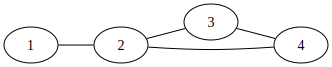

In [6]:
import graphviz as gr

g = gr.Graph(graph_attr={"rankdir": "LR"})
g.edge("1", "2")
g.edge("2", "3")
g.edge("2", "4")
g.edge("3", "4")
g

We can create a new model $f_1$ without changing the graph by adding a non-zero term
$$
\log f_1 = log (f) + \psi_{\{2,3,4\}}.
$$
Therefore $f$ is not graphical. 

On the other hand, adding any term to $f_1$ will change the graph; 
- the remaining possibilities for cardinality 2 set $\{1,3\}, \{1,4\}$ require new edges
- the remaining cardinality 3 sets have subsets $\{i,j\}\notin E$
- the cardinality 4 set is not alowed because it is a superset of $\{1,3\} \notin E$. 

Note that the presence of $\psi_{\{2,3,4\}}$ means that the strength of association between 2 and 3 depends on 4. That is what makes the graph a representation of interaction with all the terms of $f_1$. 

----

## Hierarchical Log-Linear Models

**Definition:** A log linear model is <u>hierarchical</u> if for all $A\subset S$ 
$$\psi_A = 0 \implies  (\forall B \supset A) \,\psi_B = 0.$$

All graphical models are hierarchical, but not all hierarchical models are graphical. 

--- 
e.g. Say 
$$
\begin{align*}
\log f = &\psi_{\{\}} \\
    &+ \psi_{\{1\}}+ \psi_{\{2\}} +\psi_{\{3\}} \\
    &+ \psi_{\{1,2\}} + \psi_{\{2,3\}}+ \psi_{\{3,1\}} \\
    \end{align*}
$$
The only set $A\subset \{1,2,3\}$ with $\psi_A =0$ is $S=\{1,2,3\}$. Since $S$ has no supersets,  the model is hierarchical. However, it is not graphical since a nonzero $\psi_S$ could be addedwithout changing the graph. The graph is shown below. 

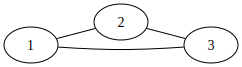

In [7]:
g = gr.Graph(graph_attr={"rankdir": "LR"})
g.edge("1", "2")
g.edge("2", "3")
g.edge("3", "1")
g

## Model Generators

This appears to just be a notation thing best learned by examples.

---
e.g. for $X=(X_1,X_2,X_3)$.

- 1.2.3 means $\log f =  \psi_{\{\}} + \psi_{\{1\}}+ \psi_{\{2\}}+ \psi_{\{3\}} + \psi_{\{1,2\}} + \psi_{\{2,3\}}+ \psi_{\{3,1\}} + \psi_{\{1,2,3\}}$
    - This is called a saturated model; such models correspond to fitting an unconstrained model. 
    - terms of order lower than 3 need to be included to make the model hierarchial.
- 1.2 + 1.3 means $\log f =  \psi_{\{\}} + \psi_{\{1\}}+ \psi_{\{2\}}+ \psi_{\{3\}} + \psi_{\{1,2\}} +  \psi_{\{1,3\}}$.
    - $\{1,2,3\}$ can not be included because it is a superset of the missing $\{2,3\}$
- 1+2+3 means $\log f =  \psi_{\{\}} + \psi_{\{1\}}+ \psi_{\{2\}}+ \psi_{\{3\}} $
    - this is the mutually independent model. 
- 1.2 in the context of 3 variables means $\log f =  \psi_{\{\}} + \psi_{\{1\}}+ \psi_{\{2\}} + \psi_{\{1,2\}}$.
    - $X_3$ is forced to have a uniform distribution here, in the sense that $X_3|(X_1,X_2)$ is uniformly distributed.  


## Fitting 

We are examining a context where $X=(X_1,...,X_m)$. A random sample of size $n$ then has the form 
$\{(X_{i1},...,X_{im})\,| i=1,...,n \}$. I will name 
- the $i$th element of the sample ${\cal X}_i$,  
- ${\cal X} = ({\cal X}_1,...,{\cal X}_n)$

The log likelihood of a random sample when we use the parameters $\beta$ is 
$$
\sum_{i=1}^n \log f ({\cal X}_i ; \beta) \, .
$$

Choice of model is choice of log linear model. How do we use this to determine the best model to use? 

For each model $M$ let $\hat{l}_M$ be the log-likelyhood evaluated at the MLE. Let $M_{\text{sat}}$ be the saturated model. 

$$H_0: M,\\
H_1: M_{\text{sat}}.
$$

**Definition:** The <u>deviance</u> of model $M$ is  $\text{dev}(M) = 2|\hat{l}_M - \hat{l}_{M_{\text{sat}}}|\, .$

The deviance is the likelihood ratio test statistic for testing $H_0$ vs $H_1$, as you saw in ch15 using optimization with constraint for multinomial distributions. 

**Theorem:** $\text{dev}(M) \stackrel{d}{\to} \chi^2_{\nu}$ where $\nu$ is the difference in number of parameters in the saturated model and the model $M$.  

So, a chi squared test can be used on $H_0$ for each $M$. 

You can 
- test every $M$ and use the one with the lowest deviance if that one passes the test
- test only hierarchical log-lihnear models, and keep the one with thelowest deviance if that passes your test.
- Use AIC 

# 20 Nonparametric Curve Estimation